In [2]:
%matplotlib inline

import random #for random numbers
import numpy as np #for transforming numbers for graph
import matplotlib.pyplot as plt #for circle graph
import time #for timing runs to make sure you don't input numbers too high

In [3]:
#//CIRCLE GRAPH//
def grapher(sugarfarms,a): 
#circle graph. 'sugarfarms' is the list of sugar at farms, 'a' is the amount of 
  #spaces in the list.
       
       graphlist = [] #for translating the sugarfarm data
       blacklist = [] #used for aesthetics around the circle
       whitelist = [] #used fora aesthetics blocking the center points
       
       for n in sugarfarms:
           if n >= 1:
               graphlist.append(0) #spaces where there aren't farmers
           else:
               graphlist.append(1) #spaces where there are farmers
           blacklist.append(1) 
           whitelist.append(0)

       r = np.asarray(graphlist) #transform to array for graph
       b = np.asarray(blacklist) #"
       w = np.asarray(whitelist) #"

       theta = []
       for i in range(0,a):
           theta.append( 2 * np.pi * (i/a)) #create y variables that graph it in a circular form
                
       #PLOT    
       fig = plt.figure() # plot function
       ax = fig.add_subplot(111, projection='polar') #specify dimensions and grid layout
       ax.scatter(theta, b, c='black', s=2, cmap='hot', alpha=1) # graph black dots
       ax.scatter(theta, r, c='red', s=10, cmap='hot', alpha=1) # graph farmer data
       ax.scatter(theta, w, c='white', s=15, cmap='hot', alpha=1) # graph white dot
       ax.set_yticklabels([]) #erase labels
       ax.set_xticklabels([]) #"
       ax.set_frame_on (False) #erase axis line
       ax.grid(False) #erase grid
#//END CIRCLE GRAPH

In [4]:
#//SIMULATION OF RING WORLD//
def runner(farmernum, spac, stop, tostop = False, startshuffed = True):        
    numberoffarmers = farmernum #number of farmers wanted
    spaces = spac #number of farms
    stopper = stop #when to stop or checkpoint
    count = 0 #always need a counter for stuff
    
    #_START_ Agent for farmers
    class farmer:
        def __init__(self, space):
        #this method just creates an object that has two attributes: sight and
          #position
            self.sight = random.randint(15,30)
            self.space = space    
    #_END_ Agent
    
    
    choosespace = list(range(0,spaces)) #create a list of farm indices
    if startshuffed == True: #used to void the shuffle if the user defines it
        random.shuffle(choosespace) #shuffle the indices if selected
        print('Shuffled Starting Points')
    
    
    sugfarms = [] #create array for the farms
    for i in range(spaces): 
        sugfarms.append(random.randint(1,4)) #assign each farm a starting value
    print('Farm Created')
    
    
    farmers = [] #create array for the farmerss
    #take the shuffled indices and using the first 30 or however many specified, initiate
     # that many farmers. assigned to farmers array
    for j in range(numberoffarmers):     
        farmers.append(farmer(choosespace[j]))
    print('Farmers Created')
        
    
    print(chr(27) + "[2J") #keep a clean screen
    print('Awaiting First Check Point') #update the user

    
    t0= time.clock() #intiate a time variable for later use

   
    while True: #WHILE loop to be broken later
        
        
        #plant growth to be used before every iteration at a rate of one and a max of 4
        for m in range(0,spaces):
            if sugfarms[m] < 4:
                sugfarms[m] = sugfarms[m] + 1
                
                
        #randomly selected farmers, so they are shuffled
        random.shuffle(farmers)
        
        
        # for farmer movement
        for k in range(0,numberoffarmers): #iterate through all of the farmers
            hit = 0 #initialize/reset a value 
            #Create a for loop that only analyzes spaces the selected farm "k" can see
            for l in range(farmers[k].space,(farmers[k].space + farmers[k].space)):
                if l != 0: #used to avoid occupied spaces
                    if l > spaces-1: #if the the viewed value is past the end of the circle, rap it around
                        l = l - spaces
                    if sugfarms[l] > hit: # only analyze if the space is bigger than the previous largest space
                        hit = sugfarms[l] #assign the largest to a stored value
                        indspace = l #store the viewed space so it can be assigned at the end
            farmers[k].space = indspace #assign largest value index to the farmers space
            sugfarms[indspace] = 0      #the farms sugar is eaten
            
    
        if count % stopper == 0 and count > 0: # triggers at specified stop or checkpoint number
            if tostop == True: #if wants to stop at a stop point it breaks the loop here
                break
            t= time.clock() - t0 #if the time is subtracted from the previously save value to record how long it took
            print(chr(27) + "[2J") #keep screen clear for the new information
            print("Iteration: ",count, sep = "") #report the iteration
            print('It took', "%.2f" % t,'seconds since last check point.' ) #report time
            code = input("Just hit enter to continue.\nType 'stop' to end the simulation and graph.\nInput: ") #let the user know his options
            t0= time.clock() #reset the timer
            if code == "stop": #if the user typed stop to exit
                break       
            print(chr(27) + "[2J") #keep screen clear 
            print("Awaiting next Check Point...") #keep the user updated
        count += 1 #ALWAYS USIN COUNTERS!
        
    print(chr(27) + "[2J") #keep screen clear 
    print("Simulation Complete") #update the user
    grapher(sugfarms,spac) #final graph is displayed
#//END SIMULATION OF RING WORLD//
    

Shuffled Starting Points
Farm Created
Farmers Created

Awaiting First Check Point

Simulation Complete


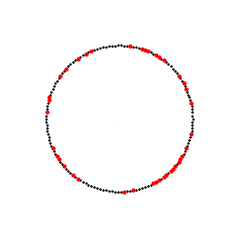

In [5]:
#//RUN THE ABOVE PROGRAM RIGHT HERE//
      
#First Arg: is amount of Farmers
#Second Arg: is amount of Farms
#Third Arg: is amount of iterations until a checkpoint is reached 
#Fourth Arg: is optional and is used to specify if you want to break at the 
    #first checkpoint or not. Default: 'False'
#Fifth arg: is optional and is used to see if you want to start the farmers together or spaced apart.
    #Default: 'True'

runner(40,150,1, tostop = True, startshuffed = True)
    